This is the second linear regression colab using the Boston House dataset. It was adapted from the link that you gave us:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Though, at this point, I have made enough changes that it has very little similarity left.

In [ ]:
# This code was adapted from the link you gave us
# But I changed it to use a different dataset, more than one column, and having a 3D graph

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model, model_selection, metrics

# load the boston dataset
# The next four lines are code I got from sklearn when they complained about the dataset being racist
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# This code is used for randomizing the train/test split, so that I have consistent results across runs of None, L1, and L2
# splitting the data and targets into testing/training sets
# I used 10%, because that's what we used in class
data_train, data_test, target_train, target_test = 0, 0, 0, 0

def randomize_data_split():
    global data_train, data_test, target_train, target_test
    data_train, data_test, target_train, target_test = model_selection.train_test_split(data, target, test_size=0.1)


randomize_data_split()


In [ ]:
mean_els = [np.mean(data[:, col]) for col in range(len(data[0]))]

def linear_regression(regularization="None", random_state=None):
    # Using all features for the linear regression, since you said we should use more and not how many
    # I think it makes L1 more noticeable, as it eliminates a bunch of features

    # Create linear regression object
    regr = linear_model.Lasso() if regularization=="L1" else linear_model.Ridge(alpha=2) if regularization=="L2" else linear_model.LinearRegression()

    print(type(regr))

    # Train the model using the training sets
    regr.fit(data_train, target_train)

    # Make predictions using the testing set
    predicted_target = regr.predict(data_test)

    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The root mean squared error

    mse = metrics.mean_squared_error(target_test, predicted_target)
    rmse = mse ** 0.5
    cod = metrics.r2_score(target_test, predicted_target)

    print("Mean squared error: %.2f" % mse)
    print("Root mean squared error: %.2f" % rmse)
    # You wanted another statistic, so let's do mean absolute error
    print("Mean absolute error: %.2f" % metrics.mean_absolute_error(target_test, predicted_target))
    # R-squared: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % cod)

    # Plot outputs - Only plotting using x=RM, because I have too many independent variables
    # I don't know why, but randomizing the test split makes a much wackier graph with a much higher MSE
    # But also a much higher coefficient of determination
    # I'm worried it might be overfitting
    plt.scatter(data_test[:, np.newaxis, 5], target_test, color="black", linewidth=1)
    plt.scatter(data_test[:, np.newaxis, 5], predicted_target, color="blue", linewidth=1)
    x = np.linspace(3, 9)
    y = regr.coef_[5] * x + regr.intercept_ + sum(mean_els[i] * regr.coef_[i] for i in range(len(mean_els)) if i != 5)

    plt.plot(x, y, color="red")

    plt.xlabel('RM')
    plt.ylabel('MEDV')

    plt.show()

    return rmse, cod


In the graphs below, the black dots are the actual values and the blue dots are the predicted values. The red line is what my model would have predicted assuming that all other variables are at the values of their means in the dataset. It doesn't quite correspond to the main bulk of the dots, because it is only looking at how the RM variable effects MEDV, while the linear regression takes into account every variable.

<class 'sklearn.linear_model._base.LinearRegression'>
Coefficients: 
 [-9.91862734e-02  4.23580151e-02  1.58592967e-02  2.86154894e+00
 -1.70169295e+01  3.58733588e+00  1.02805409e-02 -1.37902952e+00
  2.91069909e-01 -1.11652197e-02 -9.30794111e-01  8.82894405e-03
 -5.85882145e-01]
Mean squared error: 21.57
Root mean squared error: 4.64
Mean absolute error: 3.75
Coefficient of determination: 0.76


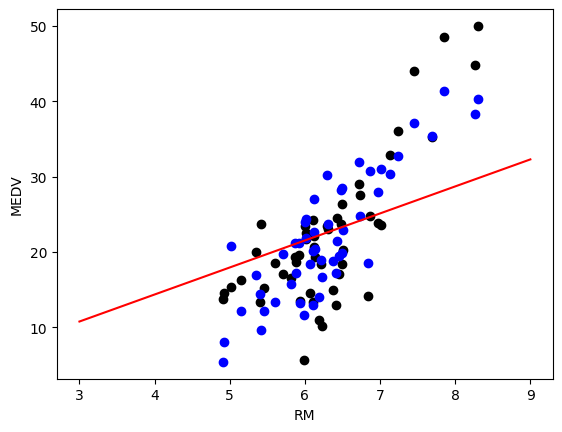

In [ ]:
# Runs using no Regularization
# I use the same seed across all three models so that the difference between them is only determined by the regularization used
seed = np.random.RandomState()
base_rmse, base_cod = linear_regression(random_state=seed)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Coefficients: 
 [-0.05523052  0.04116384 -0.          0.         -0.          0.66672658
  0.03397289 -0.51767871  0.23710068 -0.01287461 -0.72886     0.00813283
 -0.83160107]
Mean squared error: 33.98
Root mean squared error: 5.83
Mean absolute error: 4.53
Coefficient of determination: 0.62


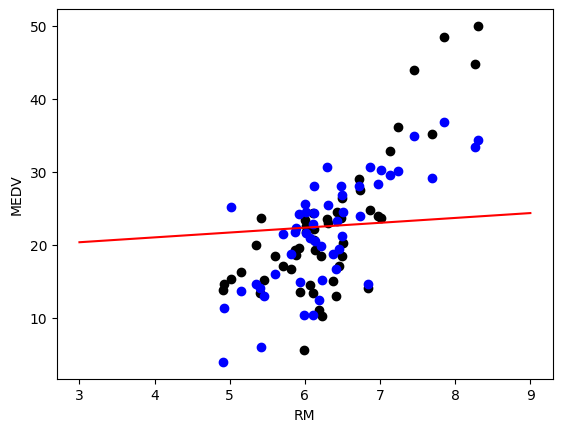


Change in root mean square error: 1.19
Change in coeffcient of determination: -0.14


In [ ]:
# L1 Regression
rmse, cod = linear_regression(regularization="L1", random_state=seed)
print("\nChange in root mean square error: %.2f" % (rmse - base_rmse))
print("Change in coeffcient of determination: %.2f" % (cod - base_cod))

<class 'sklearn.linear_model._ridge.Ridge'>
Coefficients: 
 [-9.45986409e-02  4.38246078e-02 -2.44343700e-02  2.65420171e+00
 -6.91635698e+00  3.60725600e+00  1.82654302e-03 -1.23228191e+00
  2.67747677e-01 -1.20085880e-02 -8.27569677e-01  9.50303859e-03
 -6.01089021e-01]
Mean squared error: 22.46
Root mean squared error: 4.74
Mean absolute error: 3.86
Coefficient of determination: 0.75


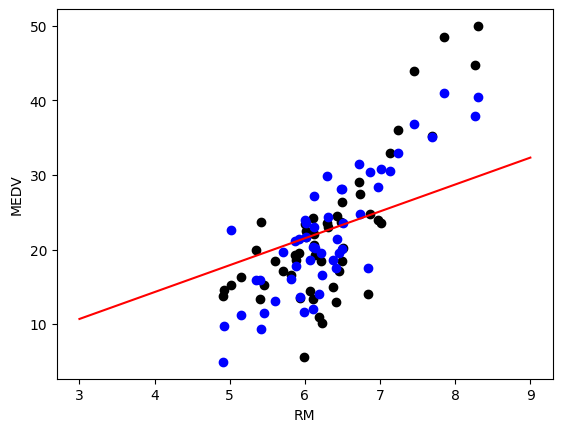


Change in root mean square error: 0.09
Change in coefficient of determination: -0.01


In [ ]:
# L2 Regression
rmse, cod = linear_regression(regularization="L2", random_state=seed)
print("\nChange in root mean square error: %.2f" % (rmse - base_rmse))
print("Change in coefficient of determination: %.2f" % (cod - base_cod))

Below is the code I used to try to determine whether No Regularization, L1, or L2 was better. It found that, consistently, Root Mean Square Error increased from no regularization to L2 to L1, while coefficient of determination decreased over that same period. It looks like the removal of overfitting decreased the model's effectiveness - though hopefully, it's more robust over different test sets.

In [ ]:
def silent_linear_regression(regularization="None", random_state=None):

    # Create linear regression object
    regr = linear_model.Lasso() if regularization=="L1" else linear_model.Ridge() if regularization=="L2" else linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(data_train, target_train)

    # Make predictions using the testing set
    predicted_target = regr.predict(data_test)

    rmse = metrics.mean_squared_error(target_test, predicted_target) ** 0.5
    cod = metrics.r2_score(target_test, predicted_target)
    return rmse, cod

sample_size = 200

none_rmse, none_cod, l1_rmse, l1_cod, l2_rmse, l2_cod = 0, 0, 0, 0, 0, 0
for _ in range(sample_size):
    randomize_data_split()

    new_rmse, new_cod = silent_linear_regression(regularization="None", random_state=seed)
    none_rmse += new_rmse
    none_cod += new_cod

    new_rmse, new_cod = silent_linear_regression(regularization="L1", random_state=seed)
    l1_rmse += new_rmse
    l1_cod += new_cod

    new_rmse, new_cod = silent_linear_regression(regularization="L2", random_state=seed)
    l2_rmse += new_rmse
    l2_cod += new_cod

print("For no regularization:")
print("Average RMSE is %.2f" % (none_rmse / sample_size))
print("Average CoD is %.3f\n" % (none_cod / sample_size))

print("For L1 regularization:")
print("Average RMSE is %.2f" % (l1_rmse / sample_size))
print("Average CoD is %.3f\n" % (l1_cod / sample_size))

print("For L2 regularization:")
print("Average RMSE is %.2f" % (l2_rmse / sample_size))
print("Average CoD is %.3f\n" % (l2_cod / sample_size))


For no regularization:
Average RMSE is 4.76
Average CoD is 0.717

For L1 regularization:
Average RMSE is 5.22
Average CoD is 0.667

For L2 regularization:
Average RMSE is 4.77
Average CoD is 0.716

